<a href="https://colab.research.google.com/github/ejrtks1020/Computer_Vision_2/blob/main/CV_yolov3_train_incredibles_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yolo v3 다운로드 및 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9957, done.
remote: Total 9957 (delta 0), reused 0 (delta 0), pack-reused 9957
Receiving objects: 100% (9957/9957), 9.31 MiB | 26.41 MiB/s, done.
Resolving deltas: 100% (6716/6716), done.
     |████████████████████████████████| 596 kB 7.3 MB/s 
     |████████████████████████████████| 1.7 MB 48.6 MB/s 
     |████████████████████████████████| 97 kB 3.9 MB/s 
     |████████████████████████████████| 180 kB 66.9 MB/s 
     |████████████████████████████████| 140 kB 49.1 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


In [ ]:
!wget -O incredibles.zip https://github.com/chulminkw/DLCV/blob/master/incredibles.zip?raw=true
!mkdir /content/incredibles
!unzip incredibles.zip -d /content/incredibles

### Dataset용 yaml 파일을 생성하고 학습 수행


In [3]:
!wget -O /content/incredibles/incredibles.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml

--2021-12-30 15:25:06--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘/content/incredibles/incredibles.yaml’

/content/incredible 100%[===================>]     190  --.-KB/s    in 0s      

2021-12-30 15:25:07 (10.5 MB/s) - ‘/content/incredibles/incredibles.yaml’ saved [190/190]



In [4]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/ultra_workdir"

 파일_001
'Colab Notebooks'
'Computer Organization and Architecture.pdf ( PDFDrive.com ).gdoc'
 CREP-15-CP26023-과제번호-학번.gdoc
 CREP-15-CP26023-HW#4-201524402.gdoc
'CREP-15-CP26023-HW7-20 ㅡ   ㅠㅍ 1524402.gdoc'
 CREP-15-CP26023-HW7-201524402.gdoc
 DaCom_For5_ch7.pptx
 DaCom_For5_ch8.pptx
 hw3_보고서양식.docx
 hw3_보고서양식.gdoc
'INC 리포트 Template의 사본 (1).gdoc'
'INC 리포트 Template의 사본.gdoc'
 이의제기신청서.pdf
 Pdf
 pet_work_dir
 PreviewFiles컴퓨터구조론8판.pdf
 발표.txt
 ultra_workdir
 이전노트북백업파일.zip
mkdir: cannot create directory ‘/mydrive/ultra_workdir’: File exists


In [ ]:
###  batch size는 8로 정할것. 16으로 설정시 성능이 좋아지지 않음. epoch는 150번으로 설정. 
# 이미지 데이터 수가 적기때문에 배치사이즈를 크게 하면 성능이 좋지않음.   
!cd /content/yolov3; python train.py --img 640 --batch 8 --epochs 150 --data /content/incredibles/incredibles.yaml --weights yolov3.pt \
                                     --project=/mydrive/ultra_workdir --name incredibles --exist-ok 

### 단일 이미지 및 Video inference 수행 

In [7]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/incredibles/images/train/incredible_028.jpg \
                            --weights /mydrive/ultra_workdir/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/incredibles/weights/best.pt'], source=/content/incredibles/images/train/incredible_028.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.8 GFLOPs
image 1/1 /content/incredibles/images/train/incredible_028.jpg: 288x640 1 mr_incredible, 1 elastic_girl, 1 dash, 1 violet, Done. (0.019s)
Speed: 0.5ms pre-process, 19.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


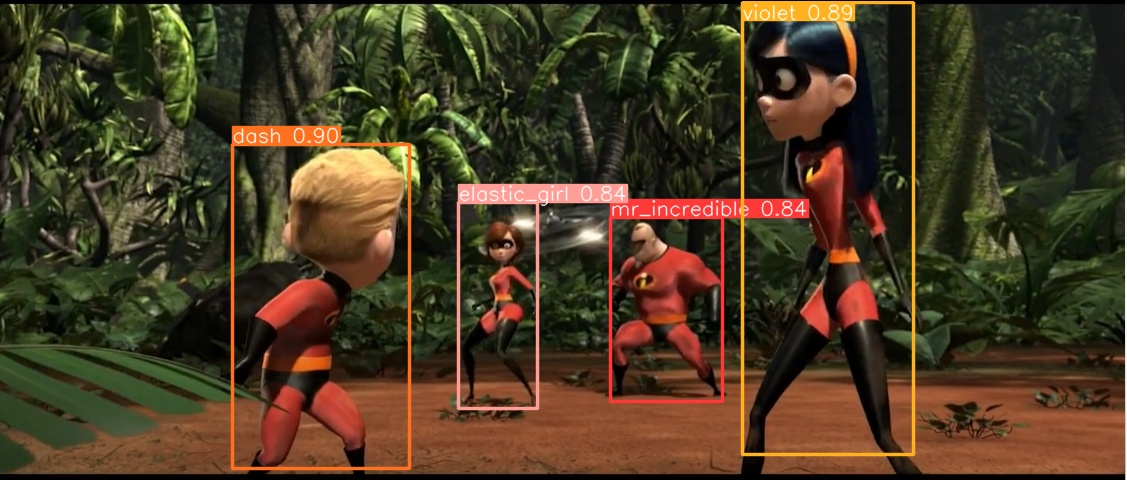

In [8]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/incredible_028.jpg', width=800)

In [9]:
!wget -O /content/incredibles/incredibles.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true

--2021-12-30 16:13:12--  https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4 [following]
--2021-12-30 16:13:12--  https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4 [following]
--2021-12-30 16:13:12--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

In [ ]:
!cd /content/yolov3;python detect.py --source /content/incredibles/incredibles.mp4 \
                            --weights /mydrive/ultra_workdir/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2